<h3>Import dataset and necessary libraries</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read our dataset
data = pd.read_csv('diabetes.csv')
data.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
510,12,84,72,31,0,29.7,0.297,46,1
684,5,136,82,0,0,0.0,0.640,69,0
236,7,181,84,21,192,35.9,0.586,51,1


In [3]:
# check for Null values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h2> Data Visualizations <h2>

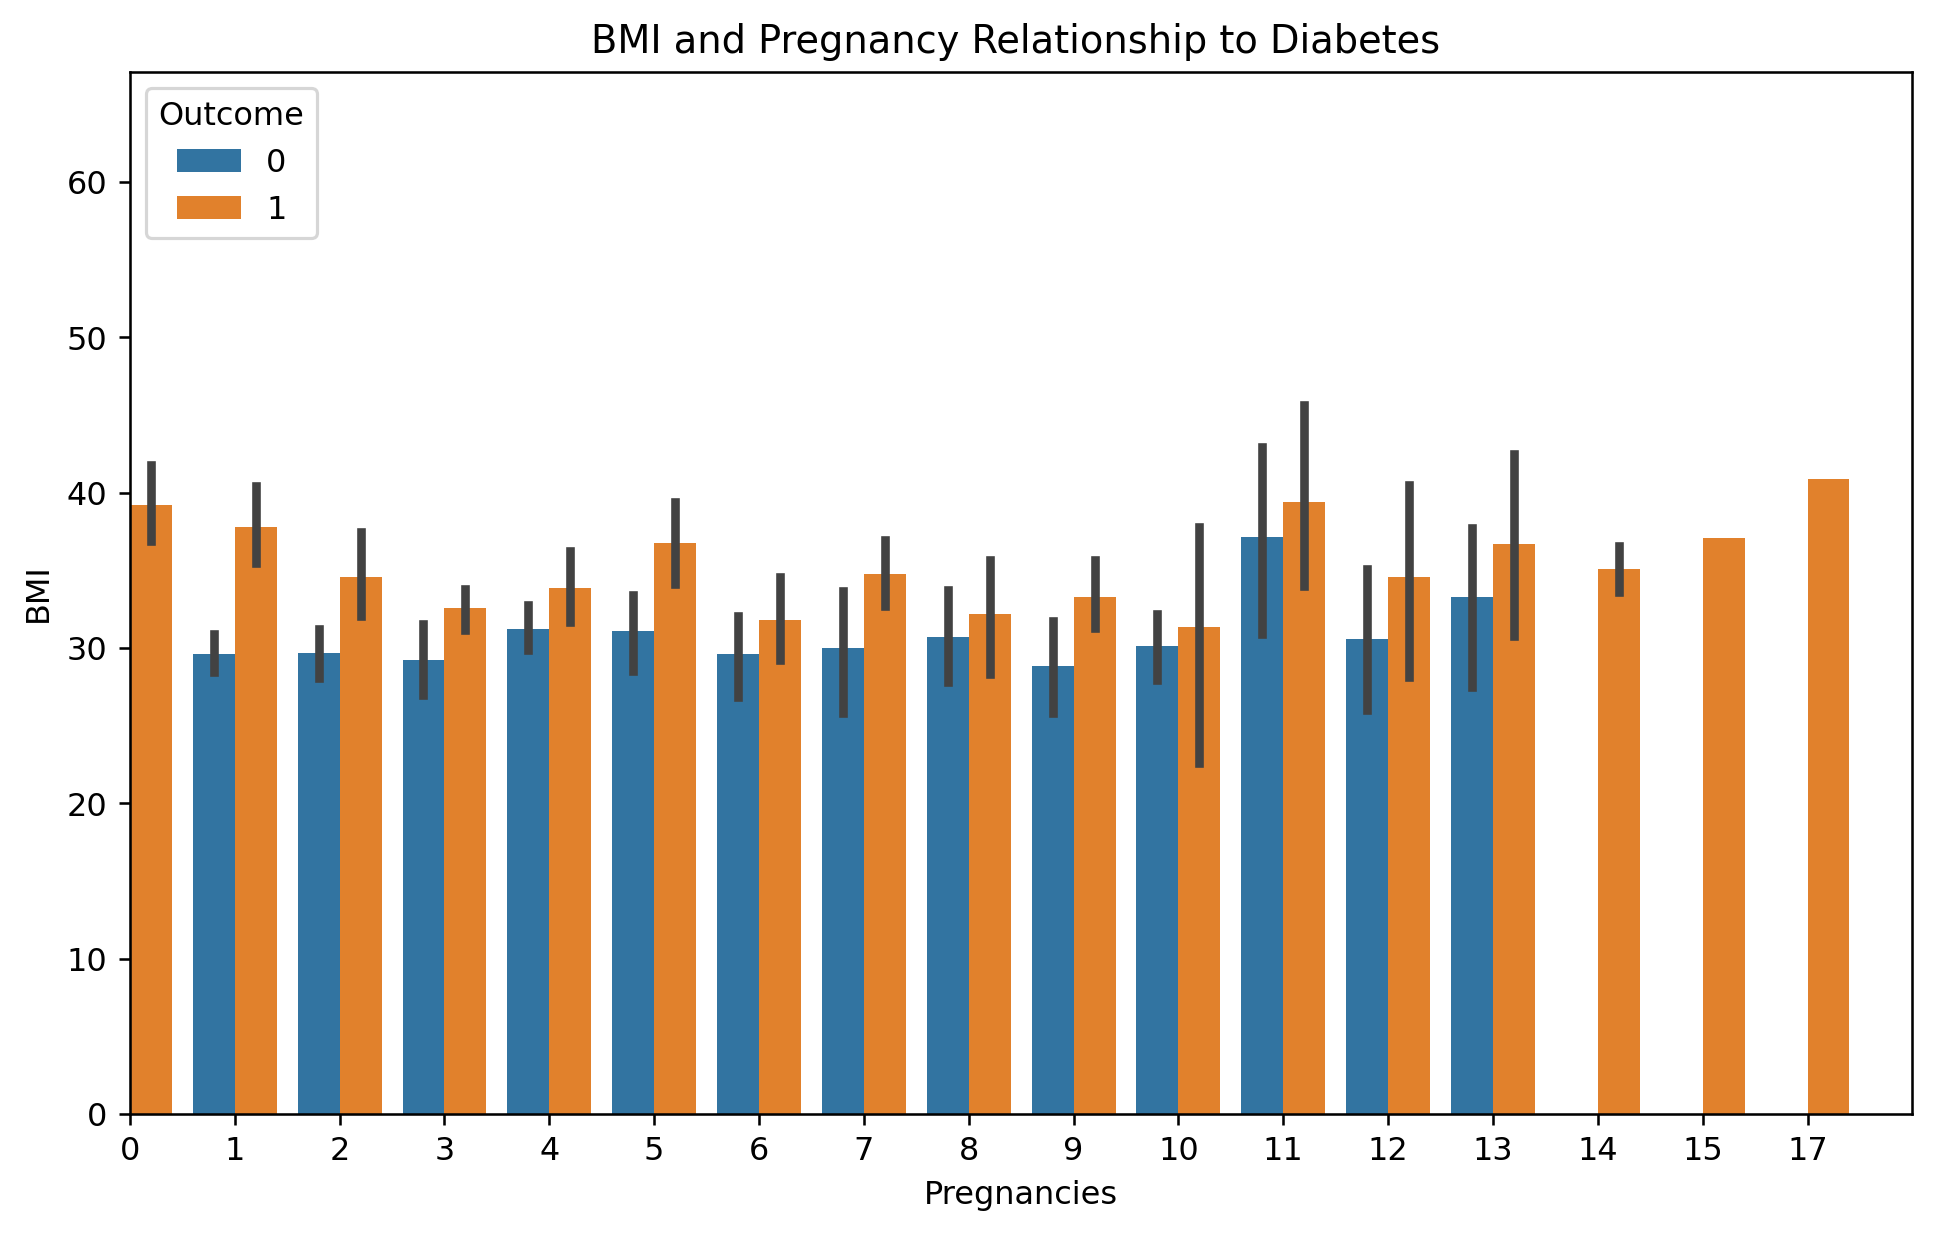

In [7]:
plt.figure(figsize=(10,6) , dpi = 230)
plt.title('BMI and Pregnancy Relationship to Diabetes ')
g = sns.barplot(x='Pregnancies' , y = 'BMI' , data=data , hue='Outcome')
g.set_ylim(0,data['BMI'].max())
g.set_xlim(0,data['Pregnancies'].max())
plt.show()

We can clearly see that high `BMI` has a high correlation with an individual getting diabetes

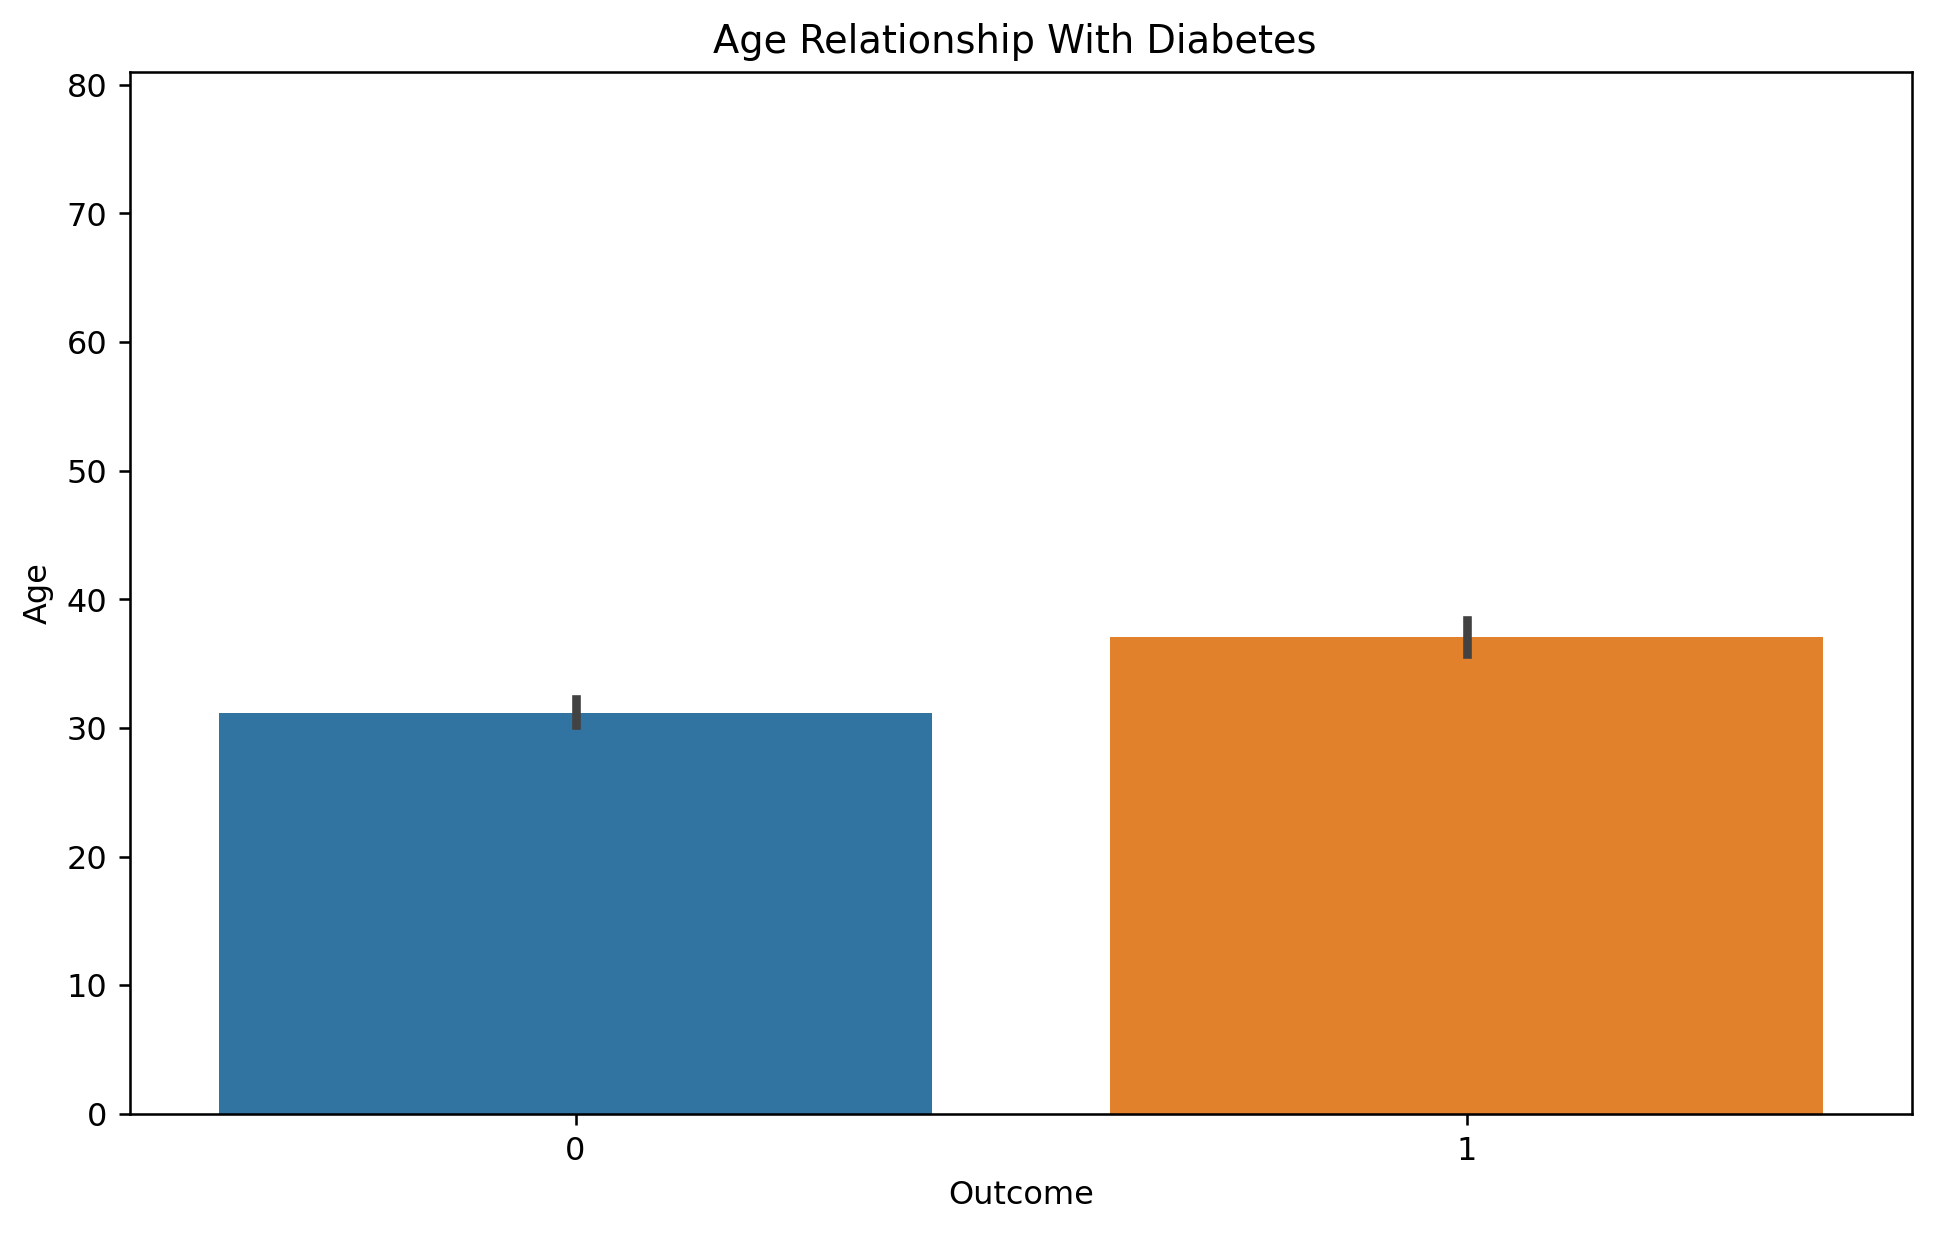

In [8]:
plt.figure(figsize=(10,6) , dpi = 230)
plt.title('Age Relationship With Diabetes ')
g = sns.barplot(x='Outcome' , y = 'Age' , data=data)
g.set_ylim(0,data['Age'].max())
plt.show()

In [9]:
corr_matrix = data.corr()

In [10]:
target_corr = corr_matrix['Outcome'].abs().sort_values(ascending=False)

In [11]:
# checking the correlation of different columns with our target
target_corr

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [12]:
selected_features = target_corr[1:8].index.to_list()

In [13]:
X = data[selected_features]
Y = data['Outcome']

In [14]:
# Scaling our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X = scaler.fit_transform(X)

In [16]:
print(X)

[[ 0.84832379  0.20401277  1.4259954  ...  0.46849198 -0.69289057
   0.90726993]
 [-1.12339636 -0.68442195 -0.19067191 ... -0.36506078 -0.69289057
   0.53090156]
 [ 1.94372388 -1.10325546 -0.10558415 ...  0.60439732 -0.69289057
  -1.28821221]
 ...
 [ 0.00330087 -0.73518964 -0.27575966 ... -0.68519336  0.27959377
   0.15453319]
 [ 0.1597866  -0.24020459  1.17073215 ... -0.37110101 -0.69289057
  -1.28821221]
 [-0.8730192  -0.20212881 -0.87137393 ... -0.47378505 -0.69289057
   0.65635768]]


In [17]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 ,stratify=Y,
                                                      random_state=42)

In [18]:
print(X.shape, x_train.shape , x_test.shape)

(768, 7) (614, 7) (154, 7)


In [19]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()

In [20]:
# Training our model
cb.fit(x_train, y_train)

Learning rate set to 0.008365
0:	learn: 0.6888020	total: 61.6ms	remaining: 1m 1s
1:	learn: 0.6848022	total: 63.3ms	remaining: 31.6s
2:	learn: 0.6802363	total: 64.1ms	remaining: 21.3s
3:	learn: 0.6762704	total: 64.8ms	remaining: 16.1s
4:	learn: 0.6719588	total: 65.5ms	remaining: 13s
5:	learn: 0.6681152	total: 66.2ms	remaining: 11s
6:	learn: 0.6636053	total: 66.9ms	remaining: 9.48s
7:	learn: 0.6595351	total: 67.6ms	remaining: 8.38s
8:	learn: 0.6555868	total: 68.3ms	remaining: 7.52s
9:	learn: 0.6523480	total: 69.1ms	remaining: 6.84s
10:	learn: 0.6483749	total: 69.9ms	remaining: 6.28s
11:	learn: 0.6445010	total: 70.7ms	remaining: 5.82s
12:	learn: 0.6409276	total: 71.6ms	remaining: 5.43s
13:	learn: 0.6370739	total: 72.4ms	remaining: 5.1s
14:	learn: 0.6340050	total: 73.2ms	remaining: 4.81s
15:	learn: 0.6308908	total: 74ms	remaining: 4.55s
16:	learn: 0.6272604	total: 74.7ms	remaining: 4.32s
17:	learn: 0.6239638	total: 75.5ms	remaining: 4.12s
18:	learn: 0.6207368	total: 76.3ms	remaining: 3.94s

In [21]:
# Model Evaluation
from sklearn.metrics import accuracy_score
x_train_pred = cb.predict(x_train)
train_accuracy = accuracy_score(x_train_pred , y_train)
print(train_accuracy)

0.9543973941368078


In [22]:
# Testing our test data
x_test_pred = cb.predict(x_test)
test_accuracy = accuracy_score(x_test_pred ,y_test)
print(test_accuracy)

0.7207792207792207


Comparing the `train` and `test` `accuracy scores` we can clearly see that the data has been `overfit`. Our `model` performs very well on the train data and poorly on the test data.

We can `verify` this by using the `dummy classifier`

In [23]:
# check overfitiing
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train , y_train)

DummyClassifier(strategy='most_frequent')

In [24]:
# evaluate the dummy classifier on the training and test data
print("Training accuracy:", dummy.score(x_train, y_train))
print("Test accuracy:", dummy.score(x_test, y_test))

Training accuracy: 0.6514657980456026
Test accuracy: 0.6493506493506493


The `accuracy scores` are not very distinct from each other. Therefore this verifies that the `catboost model` `overfitted` the data.
We can fix this by adjusting the parameters of the `l2_leaf_reg`
We shall use `grid search` for this.

In [25]:
# define the parameter grid for grid search
param_grid = {
    'l2_leaf_reg': [0.1, 1, 10, 100]
}


In [26]:
# create CatBoost classifier
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    random_seed=42,
    eval_metric='Accuracy',
    use_best_model=True
)


In [27]:
from sklearn.model_selection import GridSearchCV
# perform grid search using cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train ,eval_set=(x_test, y_test))

0:	learn: 0.7902240	test: 0.7142857	best: 0.7142857 (0)	total: 1.41ms	remaining: 1.41s
1:	learn: 0.8105906	test: 0.7207792	best: 0.7207792 (1)	total: 2.46ms	remaining: 1.23s
2:	learn: 0.8187373	test: 0.7207792	best: 0.7207792 (1)	total: 3.29ms	remaining: 1.09s
3:	learn: 0.8248473	test: 0.6883117	best: 0.7207792 (1)	total: 4.11ms	remaining: 1.02s
4:	learn: 0.8207739	test: 0.7077922	best: 0.7207792 (1)	total: 4.93ms	remaining: 981ms
5:	learn: 0.8329939	test: 0.6948052	best: 0.7207792 (1)	total: 5.76ms	remaining: 955ms
6:	learn: 0.8391039	test: 0.6818182	best: 0.7207792 (1)	total: 6.5ms	remaining: 922ms
7:	learn: 0.8370672	test: 0.7012987	best: 0.7207792 (1)	total: 7.4ms	remaining: 917ms
8:	learn: 0.8391039	test: 0.7207792	best: 0.7207792 (1)	total: 8.32ms	remaining: 916ms
9:	learn: 0.8492872	test: 0.7207792	best: 0.7207792 (1)	total: 9.17ms	remaining: 907ms
10:	learn: 0.8472505	test: 0.7337662	best: 0.7337662 (10)	total: 10.3ms	remaining: 922ms
11:	learn: 0.8492872	test: 0.7337662	best: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x14c82f2b0>,
             param_grid={'l2_leaf_reg': [0.1, 1, 10, 100]})

In [28]:
# evaluate the best model on the test data
print("Test accuracy:", grid_search.score(x_train, y_train))
print("Test accuracy:", grid_search.score(x_test, y_test))

Test accuracy: 0.7752442996742671
Test accuracy: 0.7467532467532467


The `final accuracy scores` are not very distinct , so the predictions are quite acurate.

In [31]:
best_model = grid_search.best_estimator_

In [32]:
# save the trained model to a file
best_model.save_model('catboost_model.bin')

# load the saved model from the file
loaded_model = CatBoostClassifier()
loaded_model.load_model('catboost_model.bin')
